## **Light curve**
**Author**: Chiara Virzì
This notebook is used to display data obtained from a broker to visualize the light curve of a young stellar object in a given period of time.  
The used libraries are the following:

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

In [2]:
# Folder containing CSV files
folder = 'ZTF18abuqmaq_LC'
csv_files = [f for f in os.listdir(folder) if f.endswith('.csv')]

# Column names
time_col = 'mjd'
mag_col = 'mag_corr'
diffmag_col = 'diffmaglim'
band_col = 'fid'
forced_col = 'forced' 

FileNotFoundError: [WinError 3] Impossibile trovare il percorso specificato: 'ZTF18abuqmaq_LC'

A time interval of approximately 5 months was selected (in MJD).

In [ ]:
# Time range for filtering
t_start = 60575.0
t_end = 60710.0

The data format is cvs,retrieve from the ALerCE broker , below is a cell for reading files of this type:

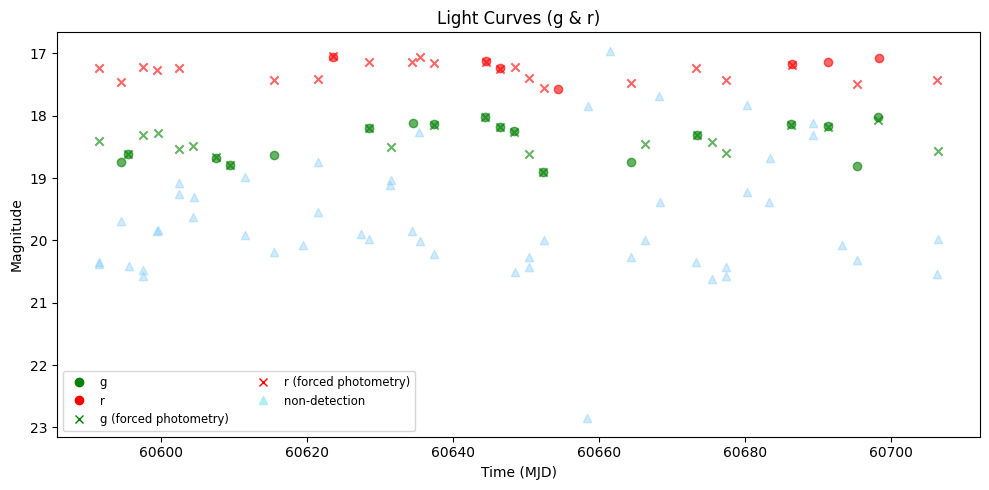

In [ ]:
# Fixed colors for bands
band_colors = {1: 'green', 2: 'red'}  # 1 = g, 2 = r

# Different markers
markers = ['o', 'x']
diffmag_marker = '^'  # marker for diffmaglim

plt.figure(figsize=(10, 5))

for i, file in enumerate(csv_files):
    file_path = os.path.join(folder, file)
    try:
        df = pd.read_csv(file_path)

        if time_col not in df.columns:
            print(f"Skipping {file}: missing '{time_col}' column.")
            continue
        mask = (df[time_col] >= t_start) & (df[time_col] <= t_end)
        df_filtered = df[mask]

        marker = markers[i % len(markers)]

        if mag_col in df.columns:
            for band in [1, 2]:
                df_band = df_filtered[df_filtered[band_col] == band]

                # Separate forced and regular by the marker
                if forced_col in df_band.columns:
                    df_forced = df_band[df_band[forced_col] == 1]
                    df_regular = df_band[df_band[forced_col] == 0]
                else:
                    df_forced = pd.DataFrame()
                    df_regular = df_band

                # Regular photometry
                if not df_regular.empty:
                    plt.scatter(df_regular[time_col], df_regular[mag_col],
                                color=band_colors[band], marker=marker, alpha=0.6)

                # Forced photometry
                if not df_forced.empty:
                    plt.scatter(df_forced[time_col], df_forced[mag_col],
                                facecolors='none', edgecolors=band_colors[band],
                                marker='x', alpha=0.8)

        elif diffmag_col in df.columns:
            plt.scatter(df_filtered[time_col], df_filtered[diffmag_col],
                        color='lightskyblue', marker=diffmag_marker, alpha=0.4)
        else:
            print(f"Skipping {file}: missing both '{mag_col}' and '{diffmag_col}'.")

    except Exception as e:
        print(f"Error with file {file}: {e}")

# Custom legend
legend_elements = [
    mlines.Line2D([], [], color='green', marker='o', linestyle='None',
                  markersize=6, label='g'),
    mlines.Line2D([], [], color='red', marker='o', linestyle='None',
                  markersize=6, label='r'),
    mlines.Line2D([], [], color='green', marker='x', linestyle='None',
                  markersize=6, label='g (forced photometry)'),
    mlines.Line2D([], [], color='red', marker='x', linestyle='None',
                  markersize=6, label='r (forced photometry)'),
    mlines.Line2D([], [], color='paleturquoise', marker='^', linestyle='None',
                  markersize=6, label='non-detection'),
]
# Final plot settings
plt.xlabel("Time (MJD)")
plt.ylabel("Magnitude")
plt.title("Light Curves (g & r)")
plt.gca().invert_yaxis()
plt.legend(handles=legend_elements, fontsize='small', ncol=2)
plt.grid(False)
plt.tight_layout()
diff_plot_filename = os.path.join(folder, 'LC.png')
#plt.savefig(diff_plot_filename)
plt.show()